In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
def get_kickstarter_data():
    '''
    Grab our data from path and read as dataframe
    '''
    
    df = pd.read_csv('KickStarter.csv')
    
    return df

In [3]:
df = get_kickstarter_data()

In [4]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [6]:
df.currency.value_counts()

USD    295365
GBP     34132
EUR     17405
CAD     14962
AUD      7950
SEK      1788
MXN      1752
NZD      1475
DKK      1129
CHF       768
NOK       722
HKD       618
SGD       555
JPY        40
Name: currency, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [8]:
def missing_zero_values_table(df):
    '''This function will look at any data set and report back on zeros and nulls for every column while also giving percentages of total values
        and also the data types. The message prints out the shape of the data frame and also tells you how many columns have nulls '''
    zero_val = (df == 0.00).astype(int).sum(axis=0)
    null_count = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mz_table = pd.concat([zero_val, null_count, mis_val_percent], axis=1)
    mz_table = mz_table.rename(
    columns = {0 : 'Zero Values', 1 : 'null_count', 2 : '% of Total Values'})
    mz_table['Total Zeroes + Null Values'] = mz_table['Zero Values'] + mz_table['null_count']
    mz_table['% Total Zero + Null Values'] = 100 * mz_table['Total Zeroes + Null Values'] / len(df)
    mz_table['Data Type'] = df.dtypes
    mz_table = mz_table[
        mz_table.iloc[:,1] >= 0].sort_values(
        '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " +  str((mz_table['null_count'] != 0).sum()) +
          " columns that have NULL values.")
    return mz_table

In [9]:
mz_table = missing_zero_values_table(df)

Your selected dataframe has 15 columns and 378661 Rows.
There are 2 columns that have NULL values.


In [10]:
mz_table.head(15)

,Zero Values,null_count,% of Total Values,Total Zeroes + Null Values,% Total Zero + Null Values,Data Type
usd pledged,68112,3797,1.0,71909,19.0,float64
name,0,4,0.0,4,0.0,object
ID,0,0,0.0,0,0.0,int64
category,0,0,0.0,0,0.0,object
main_category,0,0,0.0,0,0.0,object
currency,0,0,0.0,0,0.0,object
deadline,0,0,0.0,0,0.0,object
goal,0,0,0.0,0,0.0,float64
launched,0,0,0.0,0,0.0,object
pledged,52527,0,0.0,52527,13.9,float64


In [11]:
df.name.isnull().sum()

4

In [12]:
df['usd pledged'].isnull().sum()

3797

In [13]:
df.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [14]:
df.shape

(378661, 15)

In [15]:
def handle_missing_values(df, prop_required_column = .5, prop_required_row = .75):
    threshold = int(round(prop_required_column*len(df.index),0))
    df.dropna(axis=1, thresh=threshold, inplace=True)
    threshold = int(round(prop_required_row*len(df.columns),0))
    df.dropna(axis=0, thresh=threshold, inplace=True)
    return df

In [16]:
df = handle_missing_values(df, prop_required_column = .5, prop_required_row = 1)

In [17]:
df.isnull().sum()

ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

In [18]:
df.shape

(374860, 15)

In [19]:
378661 - 374860

3801

In [20]:
mz_table = missing_zero_values_table(df)

Your selected dataframe has 15 columns and 374860 Rows.
There are 0 columns that have NULL values.


In [21]:
mz_table 

,Zero Values,null_count,% of Total Values,Total Zeroes + Null Values,% Total Zero + Null Values,Data Type
ID,0,0,0.0,0,0.0,int64
name,0,0,0.0,0,0.0,object
category,0,0,0.0,0,0.0,object
main_category,0,0,0.0,0,0.0,object
currency,0,0,0.0,0,0.0,object
deadline,0,0,0.0,0,0.0,object
goal,0,0,0.0,0,0.0,float64
launched,0,0,0.0,0,0.0,object
pledged,51808,0,0.0,51808,13.8,float64
state,0,0,0.0,0,0.0,object


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374860 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                374860 non-null  int64  
 1   name              374860 non-null  object 
 2   category          374860 non-null  object 
 3   main_category     374860 non-null  object 
 4   currency          374860 non-null  object 
 5   deadline          374860 non-null  object 
 6   goal              374860 non-null  float64
 7   launched          374860 non-null  object 
 8   pledged           374860 non-null  float64
 9   state             374860 non-null  object 
 10  backers           374860 non-null  int64  
 11  country           374860 non-null  object 
 12  usd pledged       374860 non-null  float64
 13  usd_pledged_real  374860 non-null  float64
 14  usd_goal_real     374860 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 45.8+ MB


In [23]:
df = df.drop(columns = ['pledged', 'usd pledged'])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374860 entries, 0 to 378660
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                374860 non-null  int64  
 1   name              374860 non-null  object 
 2   category          374860 non-null  object 
 3   main_category     374860 non-null  object 
 4   currency          374860 non-null  object 
 5   deadline          374860 non-null  object 
 6   goal              374860 non-null  float64
 7   launched          374860 non-null  object 
 8   state             374860 non-null  object 
 9   backers           374860 non-null  int64  
 10  country           374860 non-null  object 
 11  usd_pledged_real  374860 non-null  float64
 12  usd_goal_real     374860 non-null  float64
dtypes: float64(3), int64(2), object(8)
memory usage: 40.0+ MB


<AxesSubplot:>

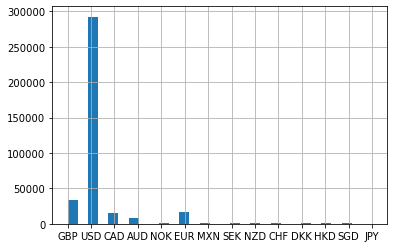

In [40]:
df.currency.hist(bins= 30)

<AxesSubplot:>

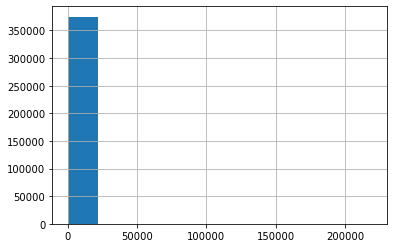

In [42]:
df.backers.hist()